In [0]:
!curl -L -o archive.zip https://www.kaggle.com/api/v1/datasets/download/uciml/iris

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3687  100  3687    0     0   8475      0 --:--:-- --:--:-- --:--:--  8475


In [0]:
!unzip -o archive.zip -d iris-dataset-cleaned

Archive:  archive.zip
  inflating: iris-dataset-cleaned/Iris.csv  
  inflating: iris-dataset-cleaned/database.sqlite  


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
# Load dataset
iris_df = pd.read_csv('iris-dataset-cleaned/Iris.csv')

In [0]:
iris_features = iris_df.drop(['Id', 'Species'], axis=1)

In [0]:
scaler = StandardScaler()
iris_standardized = scaler.fit_transform(iris_features)

In [0]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions
iris_pca = pca.fit_transform(iris_standardized)

In [0]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.72770452 0.23030523]


In [0]:
iris_df['PCA1'] = iris_pca[:, 0]
iris_df['PCA2'] = iris_pca[:, 1]

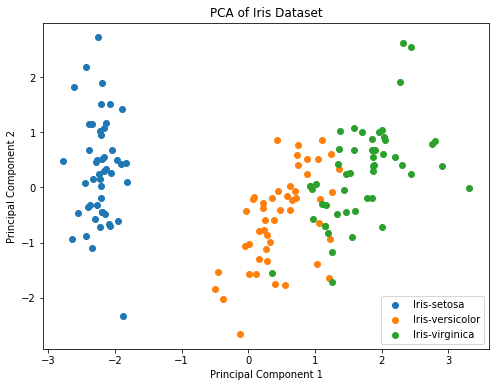

In [0]:
plt.figure(figsize=(8, 6))
for species in iris_df['Species'].unique():
    subset = iris_df[iris_df['Species'] == species]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=species)

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()